In [84]:
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [85]:
save_dir = Path('/Users/msaragoc/Projects/exoplanet_transit_classification/experiments/kepler_q1q17dr25_simdata/experiments/exominer_trained_realdata_predict_simdata_11-6-2023_0931/models/model0')

In [86]:
tce_tbl = pd.read_csv('/Users/msaragoc/Projects/exoplanet_transit_classification/data/ephemeris_tables/kepler/q1-q17_dr25/11-17-2021_1243/q1_q17_dr25_tce_3-6-2023_1734.csv')
tce_tbl = tce_tbl.loc[tce_tbl['tce_rogue_flag'] == 0]
print(f'{len(tce_tbl)} obsTCEs.')

kics_with_kois = tce_tbl.loc[~tce_tbl['kepoi_name'].isna(), 'target_id'].unique()

print(f'Found {len(kics_with_kois)} KICs with KOIs in obsTCE.')

32534 obsTCEs.
Found 6923 KICs with KOIs in obsTCE.


In [87]:
ranking_tbl = pd.read_csv('/Users/msaragoc/Projects/exoplanet_transit_classification/experiments/kepler_q1q17dr25_simdata/experiments/exominer_trained_realdata_predict_simdata_11-6-2023_0931/models/model0/ranked_predictions_alldatasets.csv')
ranking_tbl = ranking_tbl.loc[ranking_tbl['label'].isin(['INV', 'SCR1', 'SCR2'])]
print(ranking_tbl['label'].value_counts())

label
SCR2    24222
SCR1    24213
INV     19536
Name: count, dtype: int64


In [88]:
sim_tces_targets_kois = ranking_tbl['target_id'].isin(kics_with_kois)
print(f'Found {sim_tces_targets_kois.sum()} inv and scr TCEs in KICs with KOIs.')
ranking_tbl = ranking_tbl.loc[~sim_tces_targets_kois]
print(ranking_tbl['label'].value_counts())

Found 24344 inv and scr TCEs in KICs with KOIs.
label
INV     15411
SCR2    14142
SCR1    14074
Name: count, dtype: int64


In [97]:
ranking_obs_tbl = pd.read_csv('/Users/msaragoc/Projects/exoplanet_transit_classification/experiments/exominer_2021_experiments/cv_keplerq1q17dr25_exominer_configk_newsec_rbacnt0n_8-23-2021/ensemble_ranked_predictions_allfolds.csv')
ranking_obs_tbl.columns

Index(['target_id', 'tce_plnt_num', 'label', 'tce_period', 'tce_duration',
       'tce_time0bk', 'original_label', 'transit_depth', 'score',
       'predicted class', 'fold'],
      dtype='object')

Plot distribution of scr and inv TCEs as function of the period; compare with obsTCEs

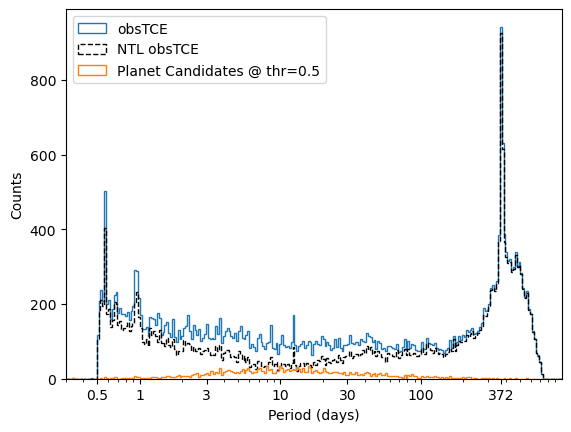

In [117]:
bins_per = np.logspace(-1, 3, 300)

f, ax = plt.subplots()
# ax.hist(ranking_tbl.loc[ranking_tbl['label'] == 'INV', 'tce_period'], bins_per, label='invTCE', histtype='step')
# ax.hist(ranking_tbl.loc[ranking_tbl['label'].isin(['SCR1', 'SCR2']), 'tce_period'], bins_per, label='scrTCE', histtype='step')
# ax.hist(ranking_tbl['tce_period'], bins_per, label='invTCE+scrTCE', histtype='step', color='red')
ax.hist(tce_tbl['tce_period'], bins_per, label='obsTCE', histtype='step', color='C0')
ax.hist(tce_tbl.loc[tce_tbl['label'] == 'NTP','tce_period'], bins_per, label='NTL obsTCE', histtype='step', linestyle='dashed', color='k')
ax.hist(ranking_obs_tbl.loc[ranking_obs_tbl['score'] >= 0.5,'tce_period'], bins_per, label='Planet Candidates @ thr=0.5', histtype='step', color='C1')
ax.legend()
ax.set_ylabel('Counts')
ax.set_xlabel('Period (days)')
ax.set_xscale('log')
ax.set_xticks([0.5, 1, 3, 10, 30, 100, 372], labels=[0.5, 1, 3, 10, 30, 100, 372])
# ax.set_xticklabels([0.5, 1, 3, 10, 30, 100, 372])
# ax.set_yscale('log')
ax.set_xlim([0.3, 1000])
f.savefig(save_dir / 'hist_period_obstces_exominerpcs_ntpobstces.svg')

Plot distribution after ExoMiner vetting of scr and inv, and obs TCEs as function of the period

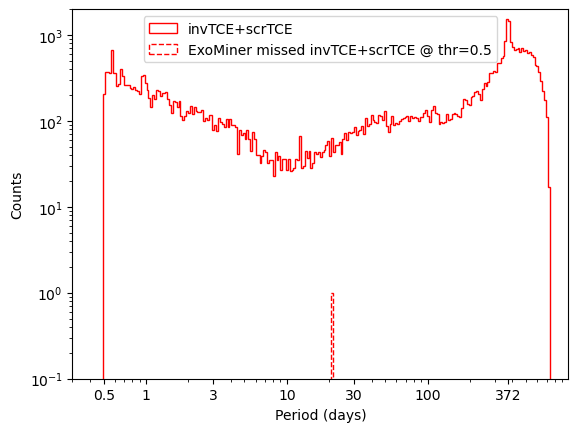

In [120]:
bins_per = np.logspace(-1, 3, 300)

sim_ranking_tbl = pd.read_csv('/Users/msaragoc/Projects/exoplanet_transit_classification/experiments/kepler_q1q17dr25_simdata/experiments/exominer_trained_realdata_predict_simdata_11-6-2023_0931/models/model0/ranked_predictions_alldatasets.csv')
sim_ranking_tbl = sim_ranking_tbl.loc[sim_ranking_tbl['label'].isin(['INV', 'SCR1', 'SCR2'])]
sim_ranking_tbl = sim_ranking_tbl.loc[~sim_tces_targets_kois]

obs_res_dirs = Path('/Users/msaragoc/Projects/exoplanet_transit_classification/experiments/kepler_q1q17dr25_simdata/experiments/exominer_train_realdata_10-13-2023_1530/cv_iter_0/')
obs_ranking_tbl = pd.concat([pd.read_csv(obs_res_dirs / f'ensemble_ranked_predictions_{dataset}set.csv') for dataset in ['train', 'val', 'test']], axis=0, ignore_index=True)
clf_thr = 0.5

f, ax = plt.subplots()
ax.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
# ax.hist(obs_ranking_tbl.loc[obs_ranking_tbl['score'] >= clf_thr, 'tce_period'], bins_per, label='obsTCE', histtype='step')
ax.hist(sim_ranking_tbl['tce_period'], bins_per, label='invTCE+scrTCE', histtype='step', color='r')  # , alpha=0.5, linestyle='dashed')
# ax.hist(sim_ranking_tbl.loc[sim_ranking_tbl['score'] >= clf_thr, 'tce_period'], bins_per, label='Missed invTCE+scrTCE', histtype='step')
# ax.hist(sim_ranking_tbl.loc[sim_ranking_tbl['score'] < clf_thr, 'tce_period'], bins_per, label='Detected invTCE+scrTCE', histtype='step')

ax.set_ylabel('Counts')
ax.set_xlabel('Period (days)')
ax.set_xscale('log')
ax.set_xticks([0.5, 1, 3, 10, 30, 100, 372], labels=[0.5, 1, 3, 10, 30, 100, 372])
ax.set_xlim([0.3, 1000])
ax.set_yscale('log')
ax.set_ylim(top=2e3)
# ax.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
ax.hist(sim_ranking_tbl.loc[sim_ranking_tbl['score'] >= clf_thr, 'tce_period'], bins_per, label='ExoMiner missed invTCE+scrTCE @ thr=0.5', histtype='step', color='r', linestyle='dashed')
ax.legend()
ax.set_yticks([1e-1, 1e0, 1e1, 1e2, 1e3])  # , labels=[1e-1, 1e0, 1e1, 1e2, 1e3])
f.savefig(save_dir / 'hist_period_invscrtces_missedtces.svg')

In [132]:
sim_ranking_tbl.loc[sim_ranking_tbl['score'] >= clf_thr]

,uid,target_id,tce_plnt_num,label,tce_period,tce_duration,tce_time0bk,ruwe,tce_prad,tce_max_mult_ev,label_id,score
5020,9632829-1,9632829,1,INV,20.766632,0.220936,136.337189,1.017329,1.336608,12.237189,0,0.754789


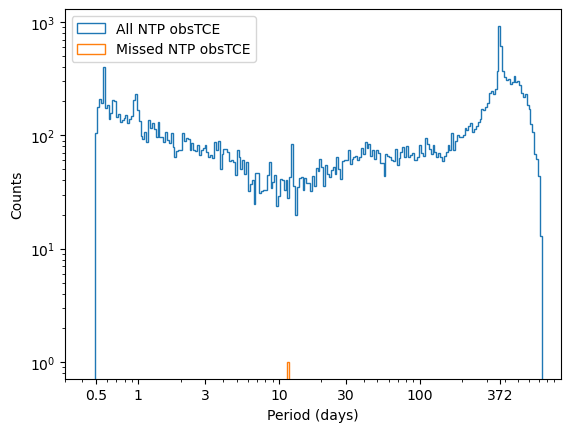

In [43]:
bins_per = np.logspace(-1, 3, 300)

obs_res_dirs = Path('/Users/msaragoc/Projects/exoplanet_transit_classification/experiments/kepler_q1q17dr25_simdata/experiments/exominer_train_realdata_10-13-2023_1530/cv_iter_0/')
obs_ranking_tbl = pd.concat([pd.read_csv(obs_res_dirs / f'ensemble_ranked_predictions_{dataset}set.csv') for dataset in ['train', 'val', 'test']], axis=0, ignore_index=True)
obs_ranking_tbl = obs_ranking_tbl.loc[obs_ranking_tbl['label'] == 'NTP']
clf_thr = 0.5

f, ax = plt.subplots()
# ax.hist(obs_ranking_tbl.loc[obs_ranking_tbl['score'] >= clf_thr, 'tce_period'], bins_per, label='obsTCE', histtype='step')
ax.hist(obs_ranking_tbl['tce_period'], bins_per, label='All NTP obsTCE', histtype='step')
ax.hist(obs_ranking_tbl.loc[obs_ranking_tbl['score'] >= clf_thr, 'tce_period'], bins_per, label='Missed NTP obsTCE', histtype='step')
# ax.hist(sim_ranking_tbl.loc[sim_ranking_tbl['score'] < clf_thr, 'tce_period'], bins_per, label='Detected invTCE+scrTCE', histtype='step')

ax.legend()
ax.set_ylabel('Counts')
ax.set_xlabel('Period (days)')
ax.set_xscale('log')
ax.set_xticks([0.5, 1, 3, 10, 30, 100, 372], labels=[0.5, 1, 3, 10, 30, 100, 372])
ax.set_xlim([0.3, 1000])
ax.set_yscale('log')
f.savefig(save_dir / 'hist_period_missed_ntp.svg')

In [36]:
ranking_tbl.loc[(ranking_tbl['score'] >= 0.5) & (ranking_tbl['label'].isin(['INV', 'SCR1', 'SCR2'])), 'label'].value_counts()
# ranking_tbl['label'].value_counts(normalize=True)

label
SCR2    36
SCR1    31
INV      5
Name: count, dtype: int64

Compute recall for inv and scr tces

In [73]:
clf_thr = 0.5

recall_cats_dict = {cat: np.nan for cat in ['INV', 'SCR1', 'SCR2', 'SCR']}
for cat in recall_cats_dict:
    ranking_cat = ranking_tbl.loc[ranking_tbl['label'].str.contains(cat)]
    n_cat = len(ranking_cat)
    tp_ranking_cat = (ranking_cat['score'] < clf_thr).sum()
    print(f'Number of observations correctly classified: {tp_ranking_cat}/{n_cat}')
    recall_cats_dict[cat] = tp_ranking_cat / n_cat

print(recall_cats_dict)

Number of observations correctly classified: 19531/19536
Number of observations correctly classified: 24182/24213
Number of observations correctly classified: 24186/24222
Number of observations correctly classified: 48368/48435
{'INV': 0.9997440622440622, 'SCR1': 0.9987196960310577, 'SCR2': 0.9985137478325489, 'SCR': 0.9986167027975638}


Plot score distribution of inv and scr TCEs

(0.0, 1.0)

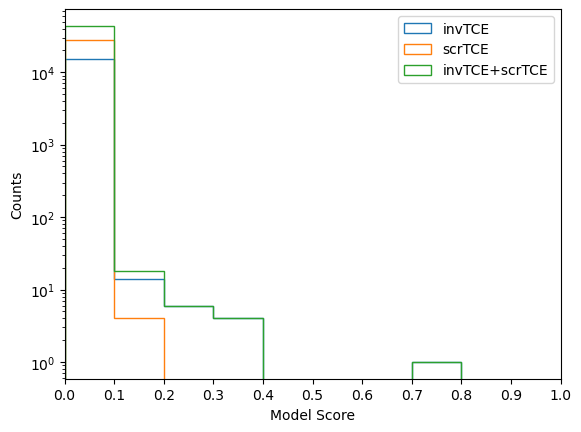

In [19]:
bins_score = np.linspace(0, 1, 11)

f, ax = plt.subplots()
ax.hist(ranking_tbl.loc[ranking_tbl['label'] == 'INV', 'score'], bins_score, label='invTCE', histtype='step')
ax.hist(ranking_tbl.loc[ranking_tbl['label'].isin(['SCR1', 'SCR2']), 'score'], bins_score, label='scrTCE', histtype='step')
ax.hist(ranking_tbl['score'], bins_score, label='invTCE+scrTCE', histtype='step')
ax.legend()
ax.set_ylabel('Counts')
ax.set_xlabel('Model Score')
ax.set_xticks(bins_score) #  labels=[0.5, 1, 3, 10, 30, 100, 372])
ax.set_yscale('log')
ax.set_xlim([0, 1])
# f.savefig(save_dir / 'hist_model_score.svg')

Plot recall per classification thr

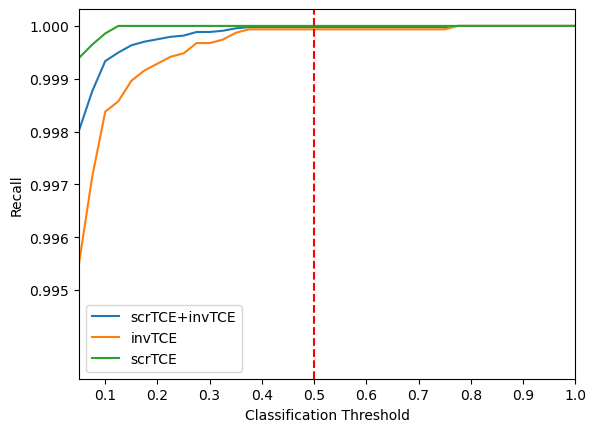

In [39]:
clf_thr_arr = np.linspace(0, 1, 41)[1:]
recall_per_clfthr = [(ranking_tbl['score'] < clf_thr).sum() / len(ranking_tbl) for clf_thr in clf_thr_arr]

recall_per_clf_thr_cats_dict = {cat: np.nan for cat in ['INV', 'SCR1', 'SCR2', 'SCR']}
for cat in recall_cats_dict:
    ranking_cat = ranking_tbl.loc[ranking_tbl['label'].str.contains(cat)]
    recall_per_clf_thr_cats_dict[cat] =[(ranking_cat['score'] < clf_thr).sum() / len(ranking_cat) for clf_thr in clf_thr_arr]
    
f, ax = plt.subplots()
ax.plot(clf_thr_arr, recall_per_clfthr, label='scrTCE+invTCE')
# ax.scatter(clf_thr_arr, recall_per_clfthr, c='k', s=8)
ax.plot(clf_thr_arr, recall_per_clf_thr_cats_dict['INV'], label='invTCE')
ax.plot(clf_thr_arr, recall_per_clf_thr_cats_dict['SCR'], label='scrTCE')
ax.set_ylabel('Recall')
ax.set_xlabel('Classification Threshold')
ax.set_xticks(bins_score) 
# ax.set_yticks([0.975, 0.9775, 0.980, 0.9825, 0.985, 0.9875, 0.990, 0.9925, 0.995, 0.9975, 1.000])
ax.set_yticks(np.linspace(0.995, 1, 6, True))
ax.set_xlim([clf_thr_arr[1], 1])
ax.legend()
ax.axvline(x=0.5, c='r', linestyle='--')
# ax.set_xscale('log')
# ax.set_yscale('log')
f.savefig(save_dir / 'plot_effectiveness_clfthr.svg')

Compute effectiveness

In [33]:
clf_thr = 0.5
n_sim = len(ranking_tbl)
n_fps = (ranking_tbl['score'] < clf_thr).sum()
eff = n_fps / n_sim

print(f'Effectiveness at classification thr={clf_thr}: {eff}')

Effectiveness at classification thr=0.5: 0.9989407247208368


Plot misclassification rate as function of MES

/var/tmp/pbs.146521.pbspl4.nas.nasa.gov/ipykernel_95866/2271455712.py:7: RuntimeWarning: invalid value encountered in scalar divide
  pc_fraction_cats_dict[cat] = [((ranking_cat['tce_max_mult_ev'] >= s_mes) & (ranking_cat['tce_max_mult_ev'] < e_mes) & (ranking_cat['score'] >= clf_thr)).sum() / ((ranking_cat['tce_max_mult_ev'] >= s_mes) & (ranking_cat['tce_max_mult_ev'] < e_mes)).sum() for s_mes, e_mes in zip(mes_bins[:-1], mes_bins[1:])]
/var/tmp/pbs.146521.pbspl4.nas.nasa.gov/ipykernel_95866/2271455712.py:28: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax.set_ylim(bottom=0)


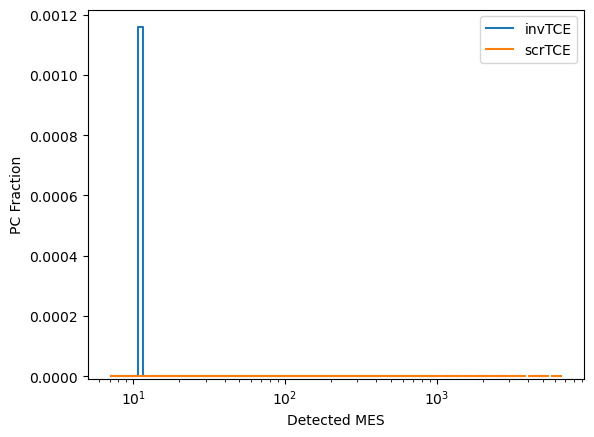

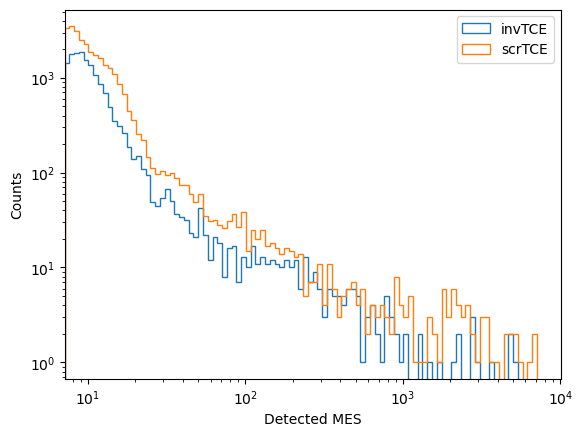

In [17]:

mes_bins = 7.1 * np.logspace(0, 3, 100, endpoint=True)
clf_thr = 0.5

pc_fraction_cats_dict = {cat: np.nan for cat in ['INV', 'SCR']}
for cat in pc_fraction_cats_dict:
    ranking_cat = ranking_tbl.loc[ranking_tbl['label'].str.contains(cat)]
    pc_fraction_cats_dict[cat] = [((ranking_cat['tce_max_mult_ev'] >= s_mes) & (ranking_cat['tce_max_mult_ev'] < e_mes) & (ranking_cat['score'] >= clf_thr)).sum() / ((ranking_cat['tce_max_mult_ev'] >= s_mes) & (ranking_cat['tce_max_mult_ev'] < e_mes)).sum() for s_mes, e_mes in zip(mes_bins[:-1], mes_bins[1:])]

f, ax = plt.subplots()
# ax.hist(x=pc_fraction)  # , bins=mes_bins) # , histtype='step')
# ax.bar(x=mes_bins[:-1], height=pc_fraction, log=True, histtype='step')
ax.step(x=mes_bins[:-1], y=pc_fraction_cats_dict['INV'], label='invTCE')
ax.step(x=mes_bins[:-1], y=pc_fraction_cats_dict['SCR'], label='scrTCE')
ax.set_ylabel('PC Fraction')
ax.set_xlabel('Detected MES')
ax.set_xscale('log')
# ax.set_yscale('log')
ax.set_ylim(bottom=-1e-5)
ax.legend()
f.savefig(save_dir / 'misclf_rate_per_mes.svg')

f, ax = plt.subplots()
ax.hist(ranking_tbl.loc[ranking_tbl['label'] == 'INV', 'tce_max_mult_ev'], mes_bins, histtype='step', label='invTCE')
ax.hist(ranking_tbl.loc[ranking_tbl['label'].str.contains('SCR'), 'tce_max_mult_ev'], mes_bins, histtype='step', label='scrTCE')
ax.set_ylabel('Counts')
ax.set_xlabel('Detected MES')
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_ylim(bottom=0)
ax.set_xlim(left=7.1)
ax.legend()
f.savefig(save_dir / 'hist_mes.svg')

Plot misclassification rate per MES/period bin

In [112]:
clf_thr = 0.5

mes_bins = np.linspace(7, 100, 50, endpoint=True)
period_bins = np.linspace(0, 500, 50, endpoint=True)
# period_bins = np.logspace(-1, 3, 300)

pc_fraction_cats_dict = {cat: np.nan * np.ones((len(period_bins), len(mes_bins))) for cat in ['INV', 'SCR']}
for cat in pc_fraction_cats_dict:
    ranking_cat = ranking_tbl.loc[ranking_tbl['label'].str.contains(cat)]
    for mes_bin_i, (mes_bin_s, mes_bin_end) in enumerate(zip(mes_bins[:-1], mes_bins[1:])):
        for per_bin_i, (per_bin_s, per_bin_end) in enumerate(zip(period_bins[:-1], period_bins[1:])):
            tbl_bin = ranking_cat.loc[
            ((ranking_cat['tce_max_mult_ev'] >= mes_bin_s) & (ranking_cat['tce_max_mult_ev'] < mes_bin_end) & 
             (ranking_cat['tce_period'] >= per_bin_s) & (ranking_cat['tce_period'] < per_bin_end))]
            pc_fraction_bin_val = (tbl_bin['score'] >= clf_thr).sum() / len(tbl_bin)
            pc_fraction_cats_dict[cat][per_bin_i, mes_bin_i] = pc_fraction_bin_val

/var/folders/rm/045v5tvx4dg93lpxdqf9w3xh0000gv/T/ipykernel_76834/3081546282.py:15: RuntimeWarning: invalid value encountered in scalar divide
  pc_fraction_bin_val = (tbl_bin['score'] >= clf_thr).sum() / len(tbl_bin)


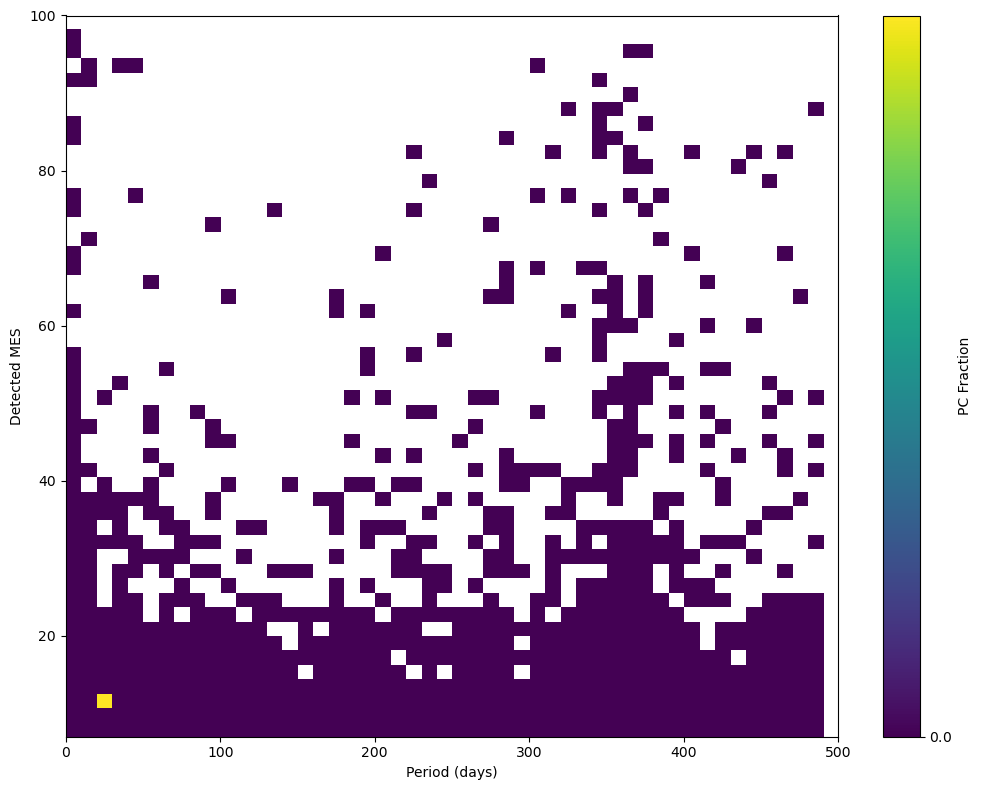

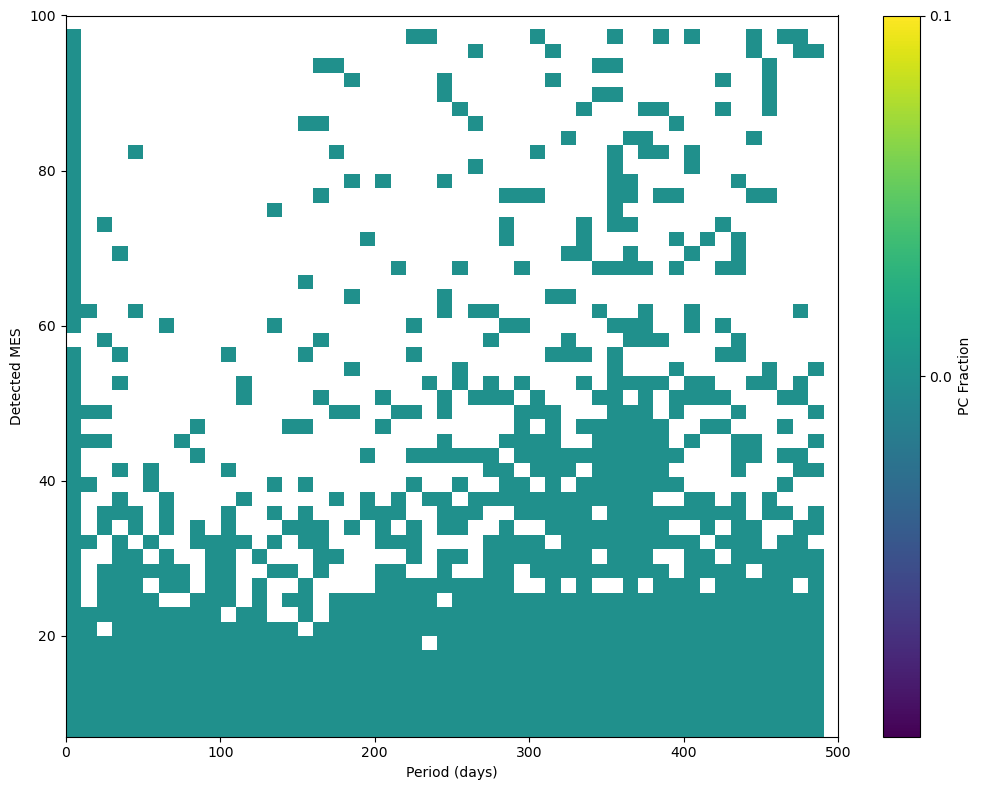

In [113]:
for cat in pc_fraction_cats_dict:
    
    f, ax = plt.subplots(figsize=(10, 8))
    im = ax.imshow(pc_fraction_cats_dict[cat].T, extent=[period_bins[0], period_bins[-1], mes_bins[0], mes_bins[-1]], aspect='auto', origin='lower')  
    ax.set_xlabel('Period (days)')
    ax.set_ylabel('Detected MES')
    # axcolor = f.add_axes([0.90, 0.1, 0.03, 0.79])
    cbar = f.colorbar(im, ax=ax, cax=None, format="$%.1f$", orientation='vertical', location='right', fraction=.1, label='PC Fraction', aspect=20, ticks=np.arange(0, 1.1, 0.1))
#     cbar.ax.tick_params(labelsize=10, rotation=0)
    f.tight_layout()
    f.savefig(save_dir / f'misclf_rate_per_period-mes_{cat}.svg')